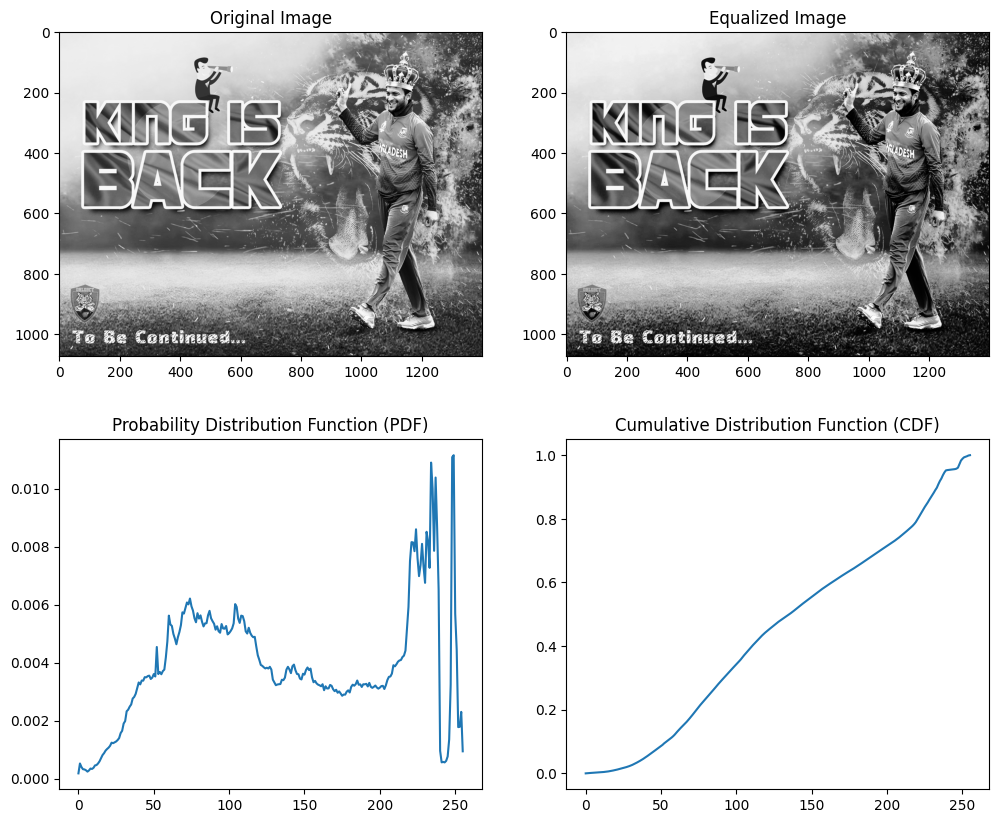

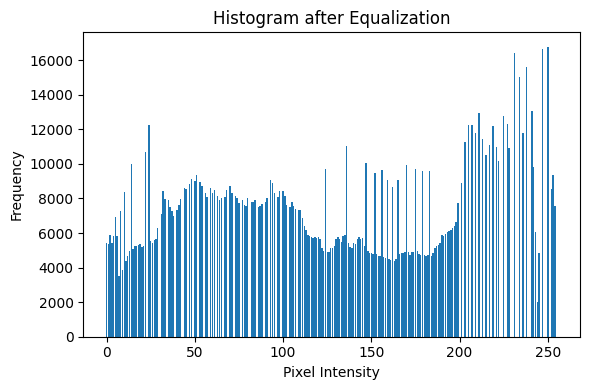

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image = cv2.imread('/sakib.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the PDF
hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])
pdf = hist / np.sum(hist)

# Calculate the CDF
cdf = np.cumsum(pdf)

# Perform histogram equalization using CDF * (L-1)
L = 256  # Number of intensity levels
equalized_image = (cdf[gray_image] * (L - 1)).astype(np.uint8)

# Calculate the histogram of the equalized image
hist_equalized, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Display original, equalized, PDF, CDF, and the histogram after equalization using Matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB))
plt.title('Equalized Image')

plt.subplot(2, 2, 3)
plt.plot(pdf)
plt.title('Probability Distribution Function (PDF)')

plt.subplot(2, 2, 4)
plt.plot(cdf)
plt.title('Cumulative Distribution Function (CDF)')

plt.figure(figsize=(6, 4))
plt.title('Histogram after Equalization')
plt.bar(np.arange(256), hist_equalized)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
